In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread,imshow,imsave
from scipy.signal import convolve2d
from skimage.filters import gaussian
from skimage.filters.rank import median,mean
from skimage.morphology import square,disk
from skimage.filters.rank import mean, median


<IPython.core.display.Javascript object>


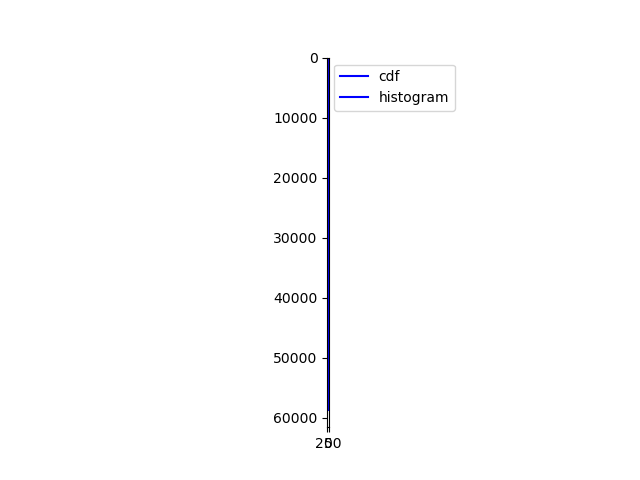

In [2]:
%matplotlib notebook 


im = imread('etretat.jpg')
plt.figure()
plt.imshow(im)
plt.show()

In [2]:
def normal_hist(im):
    hist, bins = np.histogram(im.flatten(), bins = range(257))
    return hist/np.sum(hist), bins
def cumult_hist(hist):
    cumul_hist = np.zeros(256)
    for x in range (0,256,1):
        cumul_hist[x] = np.sum(hist[0:x])
    return cumul_hist

<IPython.core.display.Javascript object>


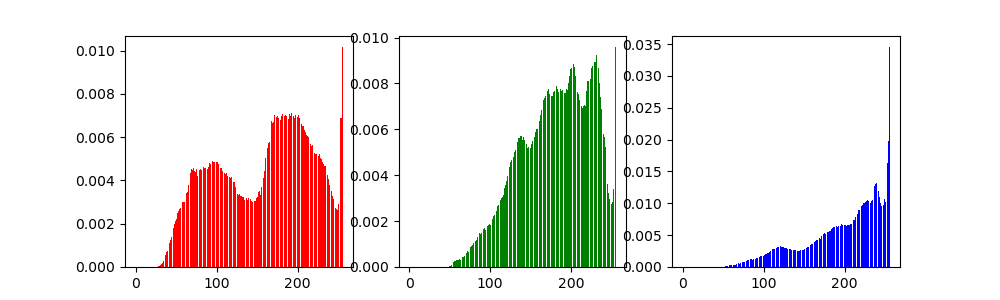

<IPython.core.display.Javascript object>


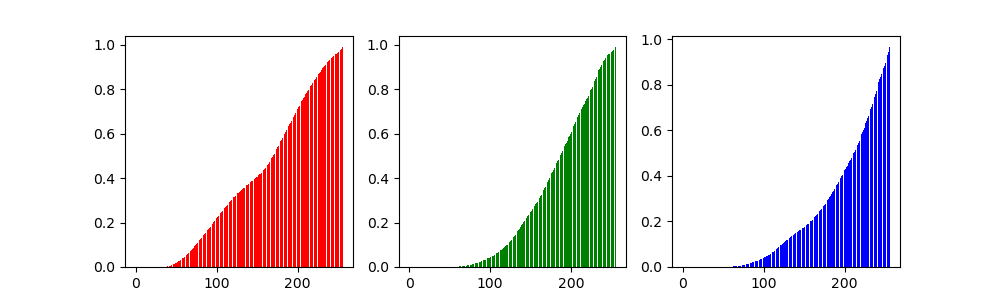

<IPython.core.display.Javascript object>


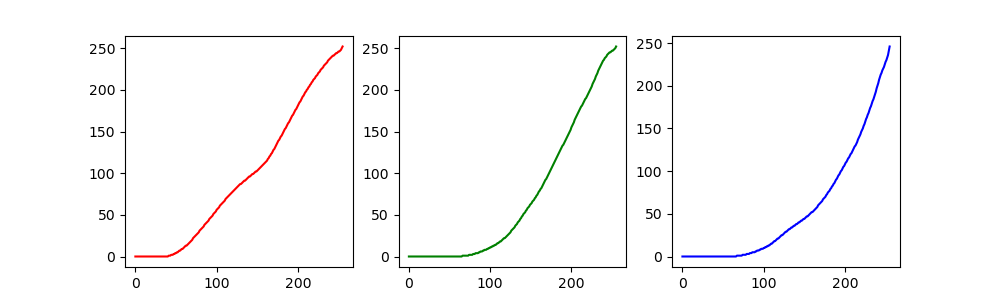

<IPython.core.display.Javascript object>


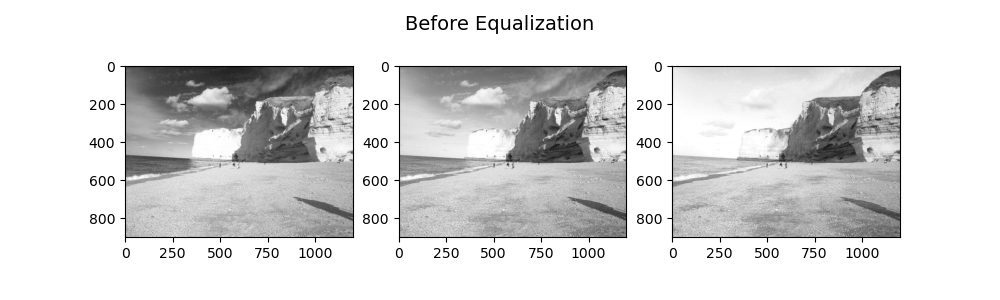

<IPython.core.display.Javascript object>


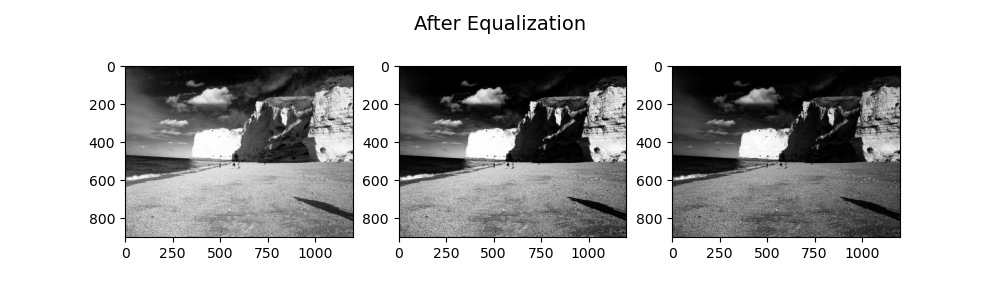

<IPython.core.display.Javascript object>


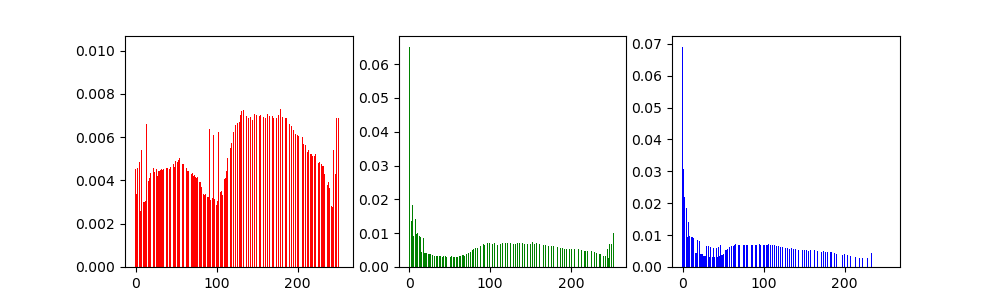

In [58]:
#First let's try to make an equalization. 
#to perform an equalization of the cameraman image (so that the histogram becomes "as flat as possible")

im_R = im[:,:,0]
im_G = im[:,:,1]
im_B = im[:,:,2]

hist_R, bins = normal_hist(im_R)
hist_G, bins = normal_hist(im_G)
hist_B, bins = normal_hist(im_B)



plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
# plt.yticks(color='w')
plt.bar(bins[:-1], hist_R, color = 'red')
plt.subplot(1,3,2)
# plt.yticks(color='w')
plt.bar(bins[:-1], hist_G, color = 'green')
plt.subplot(1,3,3)
# plt.yticks(color='w')
plt.bar(bins[:-1],hist_B, color = 'blue')
plt.show()


cumul_hist_R = cumult_hist(hist_R)
cumul_hist_G = cumult_hist(hist_G)
cumul_hist_B = cumult_hist(hist_B)



plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.bar(bins[:-1], cumul_hist_R, color = 'red')
plt.subplot(1,3,2)
plt.bar(bins[:-1], cumul_hist_G, color = 'green')
plt.subplot(1,3,3)
plt.bar(bins[:-1],cumul_hist_B, color = 'blue')
plt.show()


lut_R = (cumul_hist_R*255).astype('uint8')
lut_G = (cumul_hist_G*255).astype('uint8')
lut_B = (cumul_hist_B*255).astype('uint8')

plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.plot(bins[:-1], lut_R, color = 'red')
plt.subplot(1,3,2)
plt.plot(bins[:-1], lut_G, color = 'green')
plt.subplot(1,3,3)
plt.plot(bins[:-1],lut_B, color = 'blue')
plt.show()

equalized_im_R = lut_R[im_R]
equalized_im_G = lut_G[im_R]
equalized_im_B = lut_B[im_R]



plt.figure(figsize=(10, 3))
plt.figtext(0.5,0.95, "Before Equalization", ha="center", va="top", fontsize=14, color="black")
plt.subplot(1,3,1)
plt.imshow(im_R, cmap= plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(im_G, cmap= plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(im_B, cmap= plt.cm.gray)
plt.show()


plt.figure(figsize=(10, 3))
plt.figtext(0.5,0.95, "After Equalization", ha="center", va="top", fontsize=14, color="black")
plt.subplot(1,3,1)
plt.imshow(equalized_im_R, cmap= plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(equalized_im_G, cmap= plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(equalized_im_B, cmap= plt.cm.gray)
plt.show()





hist_R, bins = normal_hist(equalized_im_R)
hist_G, bins = normal_hist(equalized_im_G)
hist_B, bins = normal_hist(equalized_im_B)



plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
# plt.yticks(color='w')
plt.bar(bins[:-1], hist_R, color = 'red')
plt.subplot(1,3,2)
# plt.yticks(color='w')
plt.bar(bins[:-1], hist_G, color = 'green')
plt.subplot(1,3,3)
# plt.yticks(color='w')
plt.bar(bins[:-1],hist_B, color = 'blue')
plt.show()


<IPython.core.display.Javascript object>


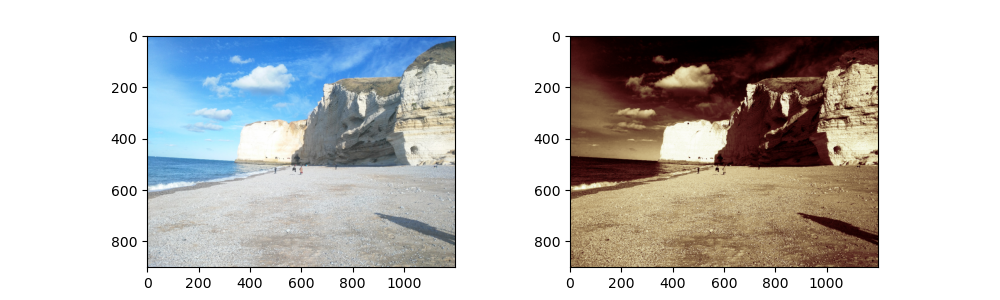

In [65]:
# im_equalized = np.zeros((im.shape[0], im.shape[1], 3))
# print(im_equalized.shape)
# print(equalized_im_R.shape)
# print(equalized_im_G.shape)
# print(equalized_im_B.shape)

# im_equalized[:,:,0]= equalized_im_R
# im_equalized[:,:,1]= equalized_im_G
# im_equalized[:,:,2]= equalized_im_B

im_equalized = np.dstack((equalized_im_R,equalized_im_G,equalized_im_B))  # stacks 3 h x w arrays -> h x w x 3


plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_equalized)

<IPython.core.display.Javascript object>


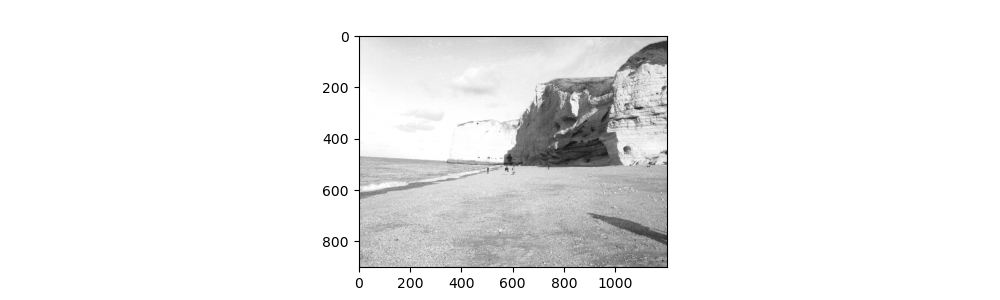

<IPython.core.display.Javascript object>


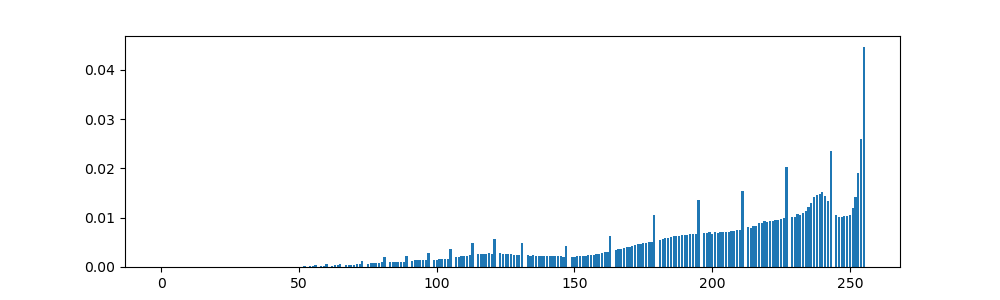

<IPython.core.display.Javascript object>


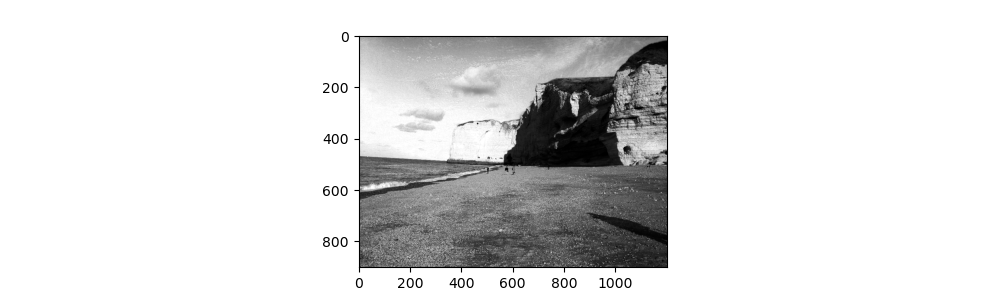

<IPython.core.display.Javascript object>


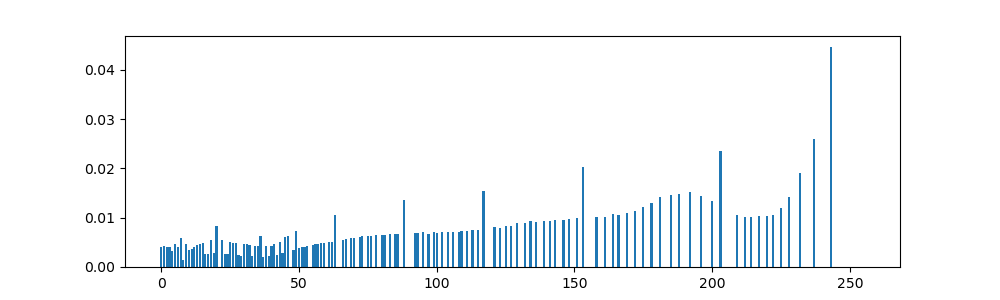

<IPython.core.display.Javascript object>


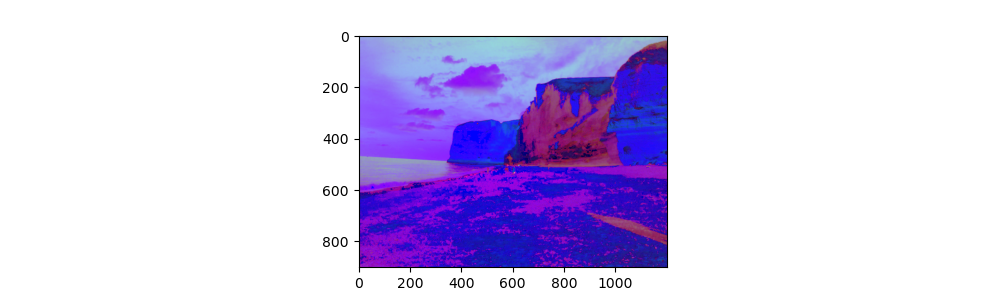

<IPython.core.display.Javascript object>


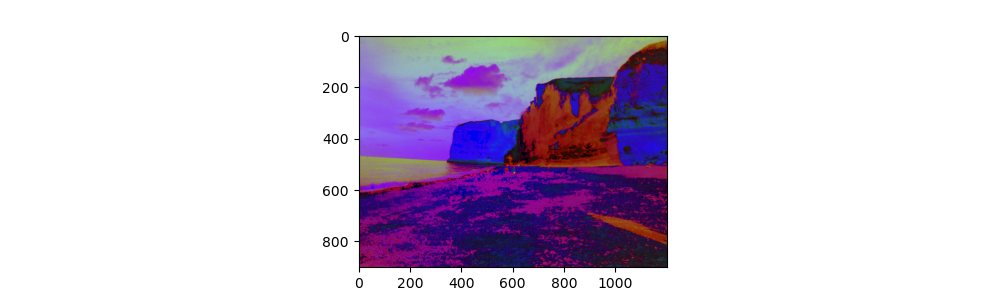

<IPython.core.display.Javascript object>


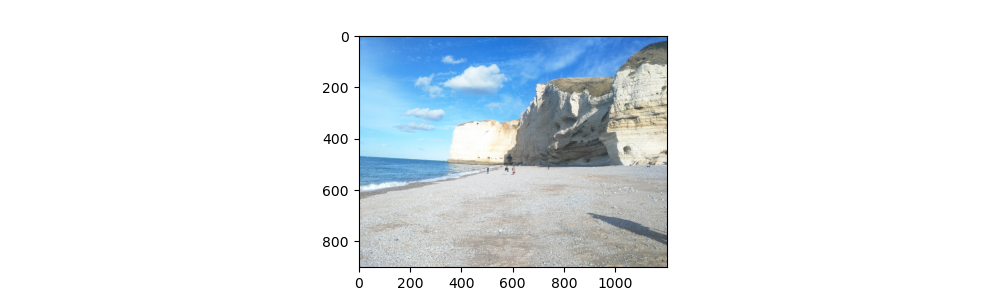

<IPython.core.display.Javascript object>


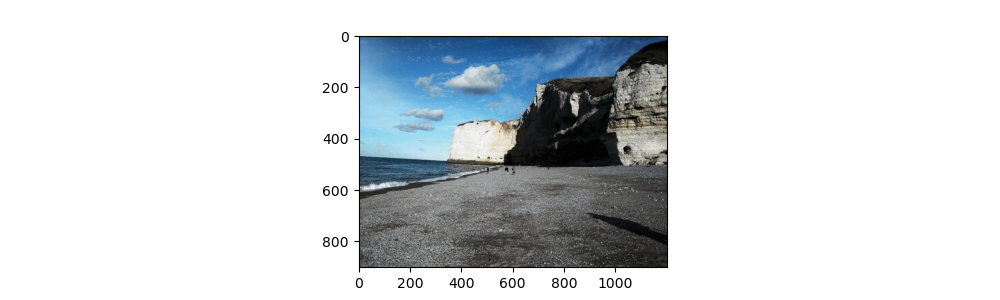

In [30]:
from skimage import data
from skimage.color import rgb2hsv, hsv2rgb
rgb_img = imread('etretat.jpg')

hsv_img = rgb2hsv(rgb_img)
value_img = (hsv_img[:, :, 2]*255).astype('uint8')

plt.figure(figsize=(10, 3))
plt.imshow(value_img, cmap = plt.cm.gray)
plt.show()

hist_V, bins = normal_hist(value_img)
plt.figure(figsize=(10, 3))
plt.bar(bins[:-1], hist_V)
plt.show()


cumul_hist_V = cumult_hist(hist_V)
lut_V = (cumul_hist_V*255).astype('uint8')

equalized_im_V = lut_V[value_img]

plt.figure(figsize=(10, 3))
plt.imshow(equalized_im_V, cmap= plt.cm.gray)
plt.show()

hist_V, bins = normal_hist(equalized_im_V)
plt.figure(figsize=(10, 3))
plt.bar(bins[:-1], hist_V)
plt.show()



plt.figure(figsize=(10, 3))
plt.imshow(hsv_img)
plt.show()


new_hsv = np.dstack(((hsv_img[:, :, 0]*255).astype('uint8'),(hsv_img[:, :, 1]*255).astype('uint8'),
                     equalized_im_V))  # stacks 3 h x w arrays -> h x w x 3

plt.figure(figsize=(10, 3))
plt.imshow(new_hsv)
plt.show()


eq_im = hsv2rgb(new_hsv)


plt.figure(figsize=(10, 3))
plt.imshow(rgb_img)
plt.show()


plt.figure(figsize=(10, 3))
plt.imshow(eq_im)
plt.show()

In [46]:
def equalize_image(im):
    hist, bins = normal_hist(im)
    cumul_hist = cumult_hist(hist)
    lut = (cumul_hist_V*255).astype('uint8')
    return lut[im]


<IPython.core.display.Javascript object>


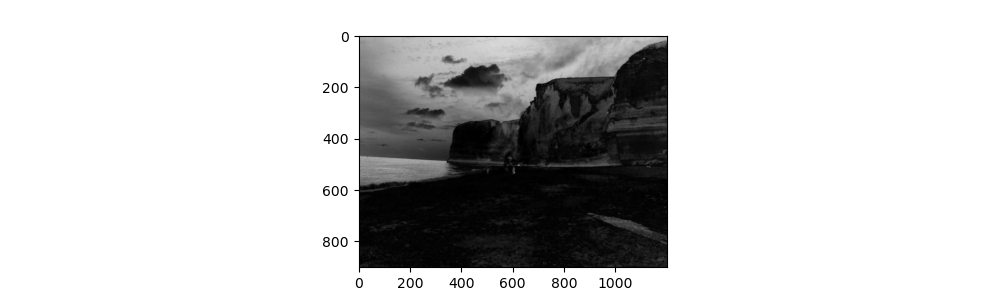

<IPython.core.display.Javascript object>


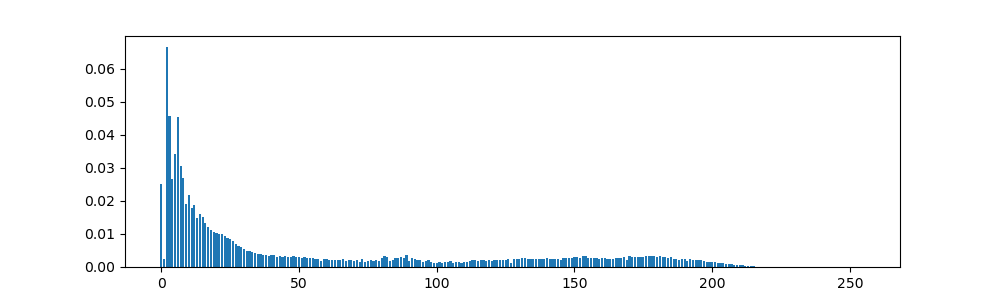

<IPython.core.display.Javascript object>


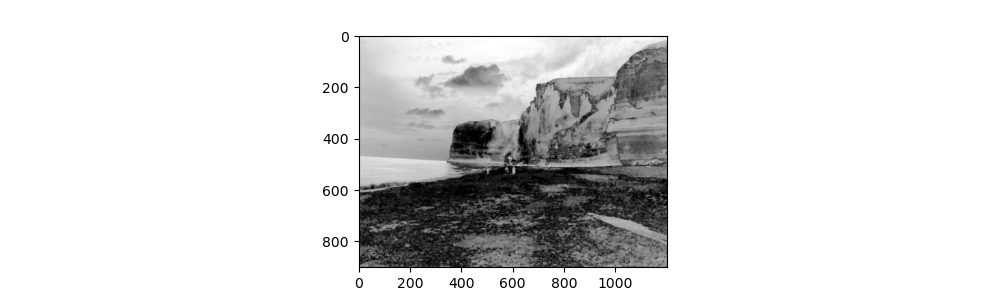

<IPython.core.display.Javascript object>


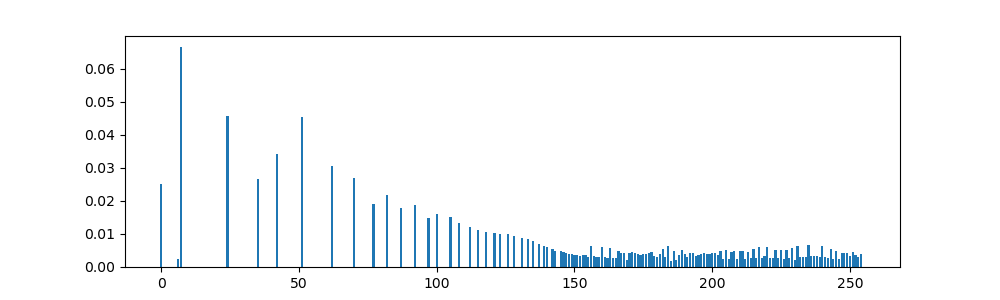

<IPython.core.display.Javascript object>


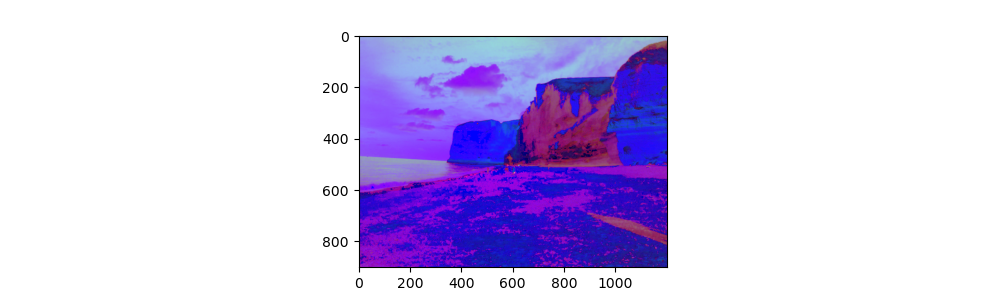

<IPython.core.display.Javascript object>


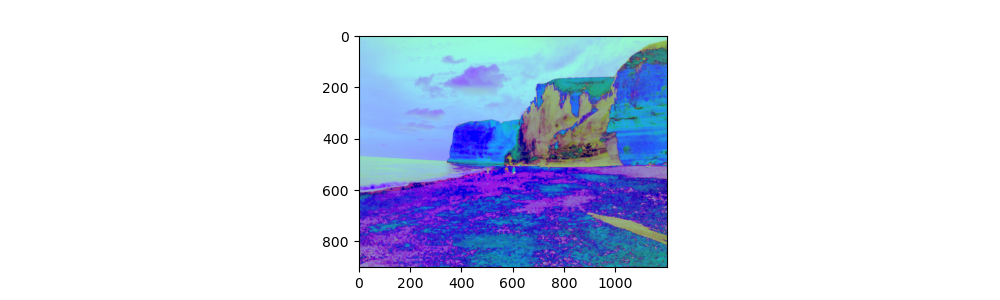

<IPython.core.display.Javascript object>


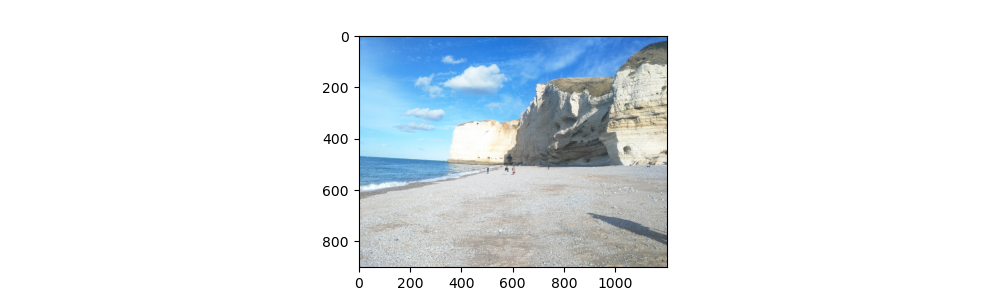

<IPython.core.display.Javascript object>


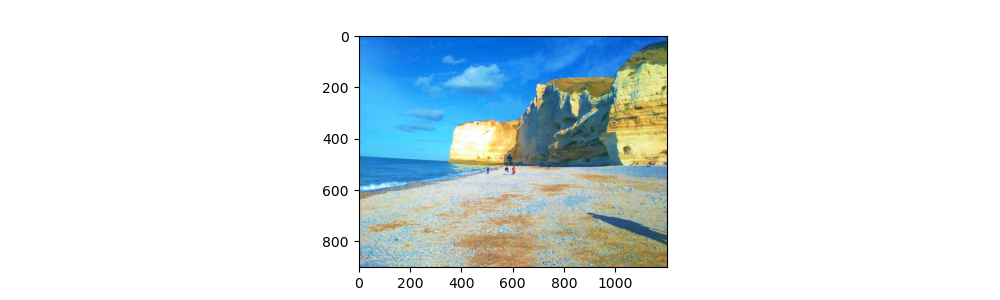

In [36]:
from skimage import data
from skimage.color import rgb2hsv, hsv2rgb
rgb_img = imread('etretat.jpg')

hsv_img = rgb2hsv(rgb_img)
value_img = (hsv_img[:, :, 1]*255).astype('uint8')

plt.figure(figsize=(10, 3))
plt.imshow(value_img, cmap = plt.cm.gray)
plt.show()

hist_V, bins = normal_hist(value_img)
plt.figure(figsize=(10, 3))
plt.bar(bins[:-1], hist_V)
plt.show()


cumul_hist_V = cumult_hist(hist_V)
lut_V = (cumul_hist_V*255).astype('uint8')

equalized_im_V = lut_V[value_img]

plt.figure(figsize=(10, 3))
plt.imshow(equalized_im_V, cmap= plt.cm.gray)
plt.show()

hist_V, bins = normal_hist(equalized_im_V)
plt.figure(figsize=(10, 3))
plt.bar(bins[:-1], hist_V)
plt.show()



plt.figure(figsize=(10, 3))
plt.imshow(hsv_img)
plt.show()


new_hsv = np.dstack(((hsv_img[:, :, 0]*255).astype('uint8'),equalized_im_V,
                     (hsv_img[:, :, 2]*255).astype('uint8')))  # stacks 3 h x w arrays -> h x w x 3

plt.figure(figsize=(10, 3))
plt.imshow(new_hsv)
plt.show()


eq_im = hsv2rgb(new_hsv)


plt.figure(figsize=(10, 3))
plt.imshow(rgb_img)
plt.show()


plt.figure(figsize=(10, 3))
plt.imshow(eq_im)
plt.show()

<IPython.core.display.Javascript object>


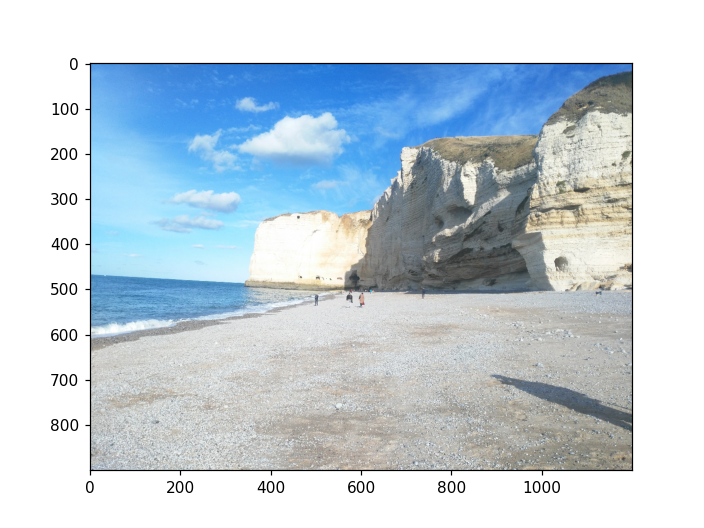

<IPython.core.display.Javascript object>


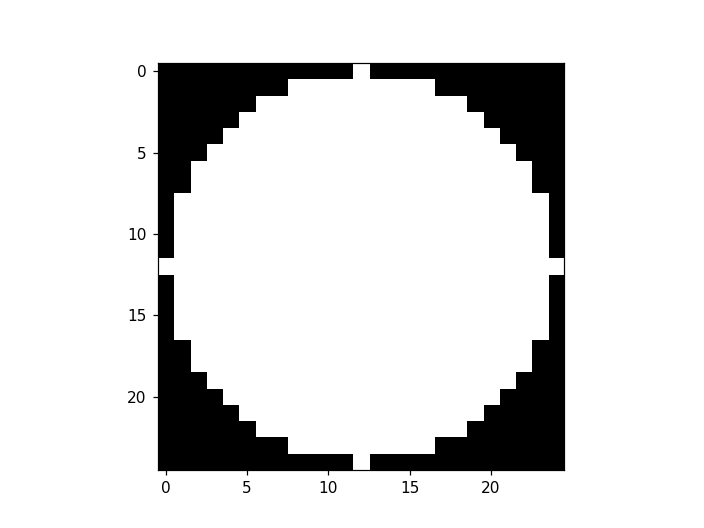

<IPython.core.display.Javascript object>


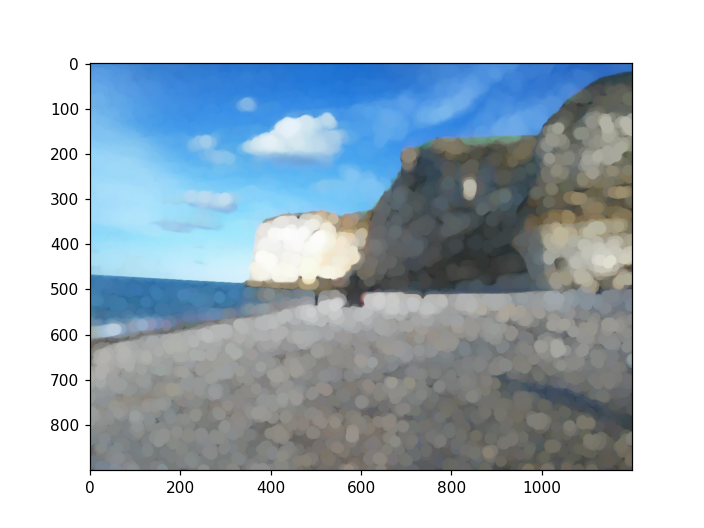

In [12]:
from skimage.morphology import disk, square, opening, closing, erosion, dilation, label

%matplotlib notebook
rgb_im = imread('etretat.jpg')

im_R = rgb_im[:,:,0]
im_G = rgb_im[:,:,1]
im_B = rgb_im[:,:,2]

plt.figure()
plt.imshow(rgb_im,cmap=plt.cm.gray)
plt.show()

radius_to_remove = 12
disk_im = disk(radius_to_remove)
plt.figure()
plt.imshow(disk_im, cmap = plt.cm.gray) 
plt.show()



op_R = opening(im_R, disk_im)
op_G = opening(im_G, disk_im)
op_B = opening(im_B, disk_im)


op_rgb = np.dstack((op_R, op_G, op_B)) 

plt.figure()
plt.imshow(op_rgb,cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


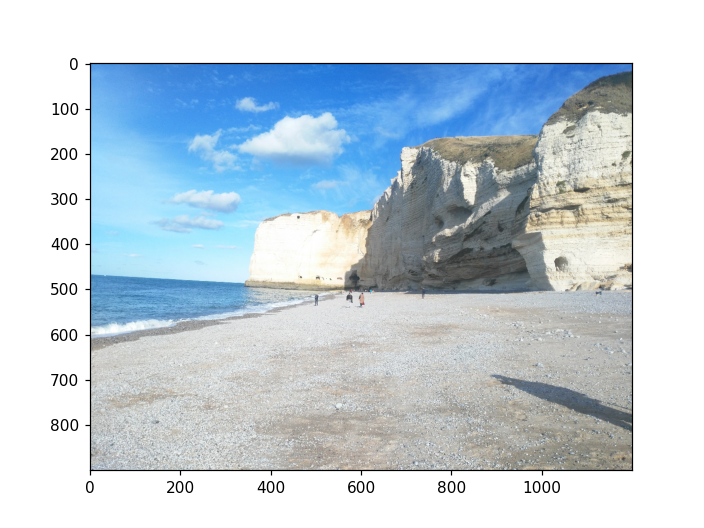

<IPython.core.display.Javascript object>


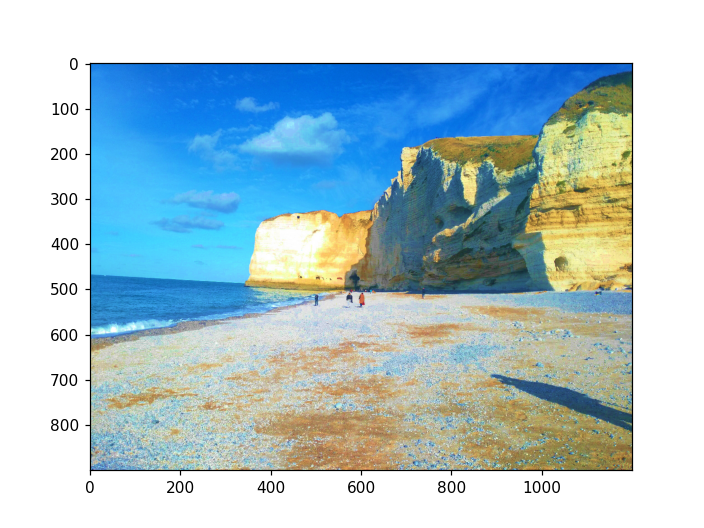

In [49]:
from skimage import data
from skimage.color import rgb2hsv, hsv2rgb

rgb_img = imread('etretat.jpg')
hsv_img = rgb2hsv(rgb_img)
value_img = (hsv_img[:, :, 1]*255).astype('uint8')


new_hsv = np.dstack(((hsv_img[:, :, 0]*255).astype('uint8'),equalize_image(value_img),
                     (hsv_img[:, :, 2]*255).astype('uint8')))
eq_im = hsv2rgb(new_hsv)



plt.figure()
plt.imshow(rgb_img)
plt.show()
plt.figure()
plt.imshow(eq_im)
plt.show()

In [13]:
def auto_level(im, Tmin, Tmax):
    lut = np.zeros(256)
    lut [:Tmin] =0
    lut[Tmax:256] = 255
    lut_t = lut
    pente = (255-0)/(Tmax-Tmin) 
    for x in range(Tmin+1, Tmax,1):
        lut[x] = int(pente * (x-Tmin))
    return lut[im]

<IPython.core.display.Javascript object>


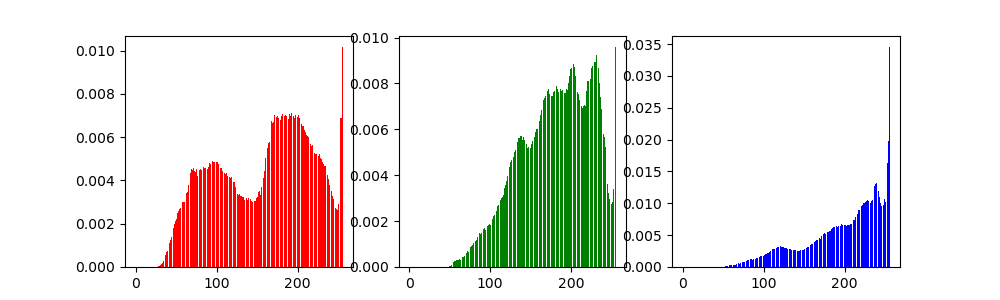

<IPython.core.display.Javascript object>


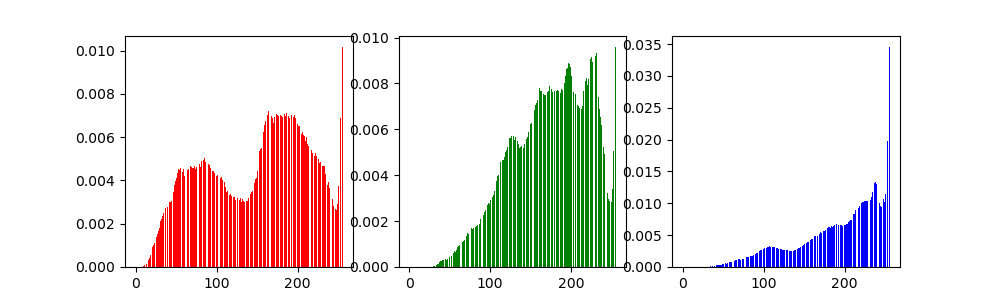

<IPython.core.display.Javascript object>


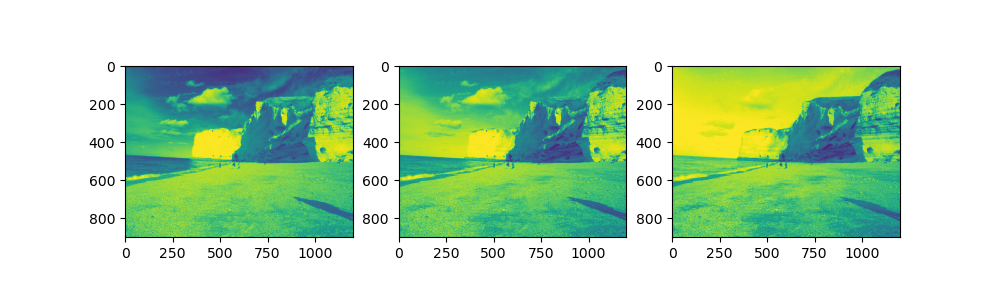

<IPython.core.display.Javascript object>


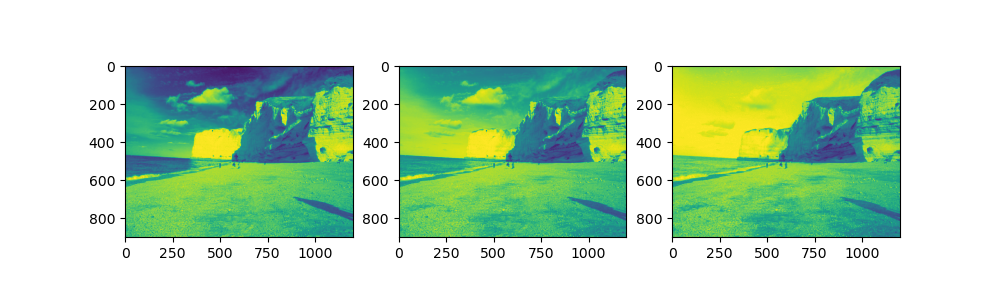

<IPython.core.display.Javascript object>


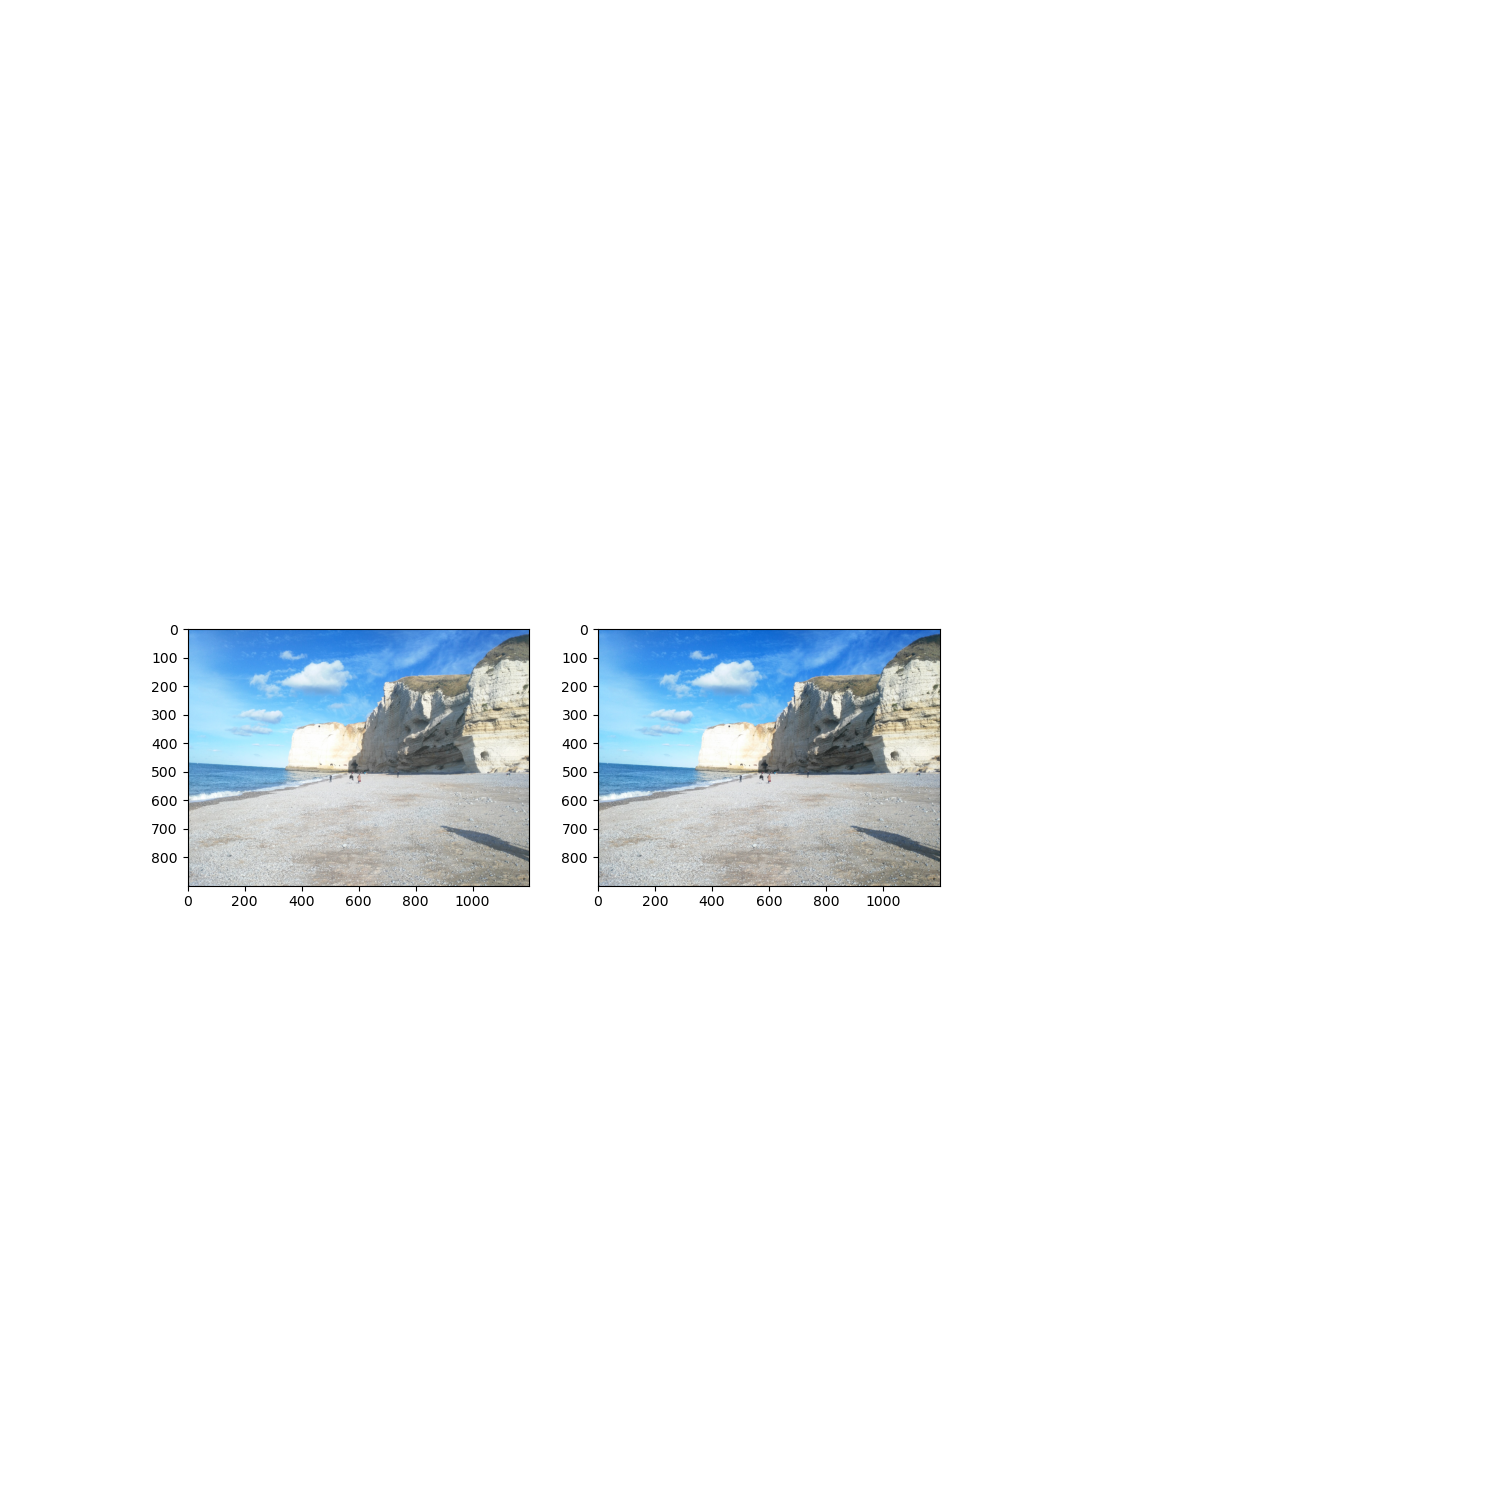

In [31]:
im = imread('etretat.jpg')
im_R = im[:,:,0]
im_G = im[:,:,1]
im_B = im[:,:,2]



hist_R, bins = normal_hist(im_R)
hist_G, bins = normal_hist(im_G)
hist_B, bins = normal_hist(im_B)



plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.bar(bins[:-1], hist_R, color = 'red')
plt.subplot(1,3,2)
plt.bar(bins[:-1], hist_G, color = 'green')
plt.subplot(1,3,3)
plt.bar(bins[:-1],hist_B, color = 'blue')
plt.show()




auto_R = auto_level(im_R, 20, 255)
auto_G = auto_level(im_G, 20, 255)
auto_B = auto_level(im_B, 20, 255)

hist_R, bins = normal_hist(auto_R)
hist_G, bins = normal_hist(auto_G)
hist_B, bins = normal_hist(auto_B)


plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.bar(bins[:-1], hist_R, color = 'red')
plt.subplot(1,3,2)
plt.bar(bins[:-1], hist_G, color = 'green')
plt.subplot(1,3,3)
plt.bar(bins[:-1],hist_B, color = 'blue')
plt.show()

plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.imshow(im_R)
plt.subplot(1,3,2)
plt.imshow(im_G)
plt.subplot(1,3,3)
plt.imshow(im_B)
plt.show()




plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.imshow(auto_R)
plt.subplot(1,3,2)
plt.imshow(auto_G)
plt.subplot(1,3,3)
plt.imshow(auto_B)
plt.show()


new_im = (np.dstack((auto_R, auto_G, auto_B))).astype('uint8')

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(new_im)
